In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.datasets import load_digits
from sklearn import datasets
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as tt

In [2]:
torch.cuda.is_available()

True

In [3]:
class Digits(Dataset):

    def __init__(self, mode="train", transforms=None):
        digits = load_digits()
        if mode == "train":
            self.data = digits.data[:1000].astype(np.float32)
        elif mode == "val":
            self.data = digits.data[1000:1350].astype(np.float32)
        else:
            self.data = digits.data[1350:].astype(np.float32)

        self.transforms = transforms

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        if self.transforms:
            sample = self.transforms(sample)
        return sample

In [6]:
train_data = Digits()
test_data = Digits(mode="val")
len(train_data), len(test_data)

(1000, 350)

In [ ]:
train_data[0].shape

(999, 64)

(np.float64(-0.5), np.float64(7.5), np.float64(7.5), np.float64(-0.5))

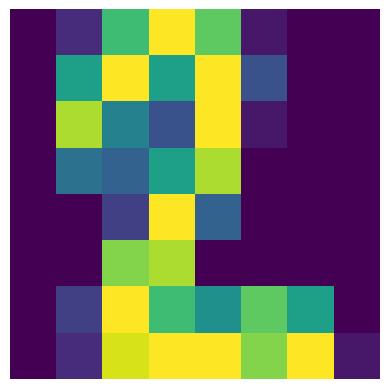

In [28]:
import matplotlib.pyplot as plt
import random

img = train_data[random.choice(range(len(train_data)))].reshape((8,8))
plt.imshow(img)
plt.axis("off")